# Random Forest - Fraud Check Problem

## ------------------------------------------------------------------------------------------------------------------------

## Problem Statement :- Use decision trees to prepare a model on fraud data .
## Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

## 1.Importing Libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset :

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv',sep=',')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Data Understanding :

### 3.1 Data Description :

* **Undergrad** : person is under graduated or not
* **Marital.Status** : marital status of a person
* **Taxable.Income** : Taxable income is the amount of how much tax an individual owes to the government 
* **Work Experience** : Work experience of an individual person
* **Urban** : Whether that person belongs to urban area or not

### 3.2 Initial Analysis :

In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## 4. Data Preparation :

In [6]:
# Renaming columns :

fraud_data.columns = ['undergrad','marital_status','taxable_income','city_population','work_experience','urban']
fraud_data.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
# Creating a target column
fraud_data['target'] = 'N/A'
fraud_data.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,NO,Single,68833,50047,10,YES,N/A
1,YES,Divorced,33700,134075,18,YES,N/A
2,NO,Married,36925,160205,30,YES,N/A
3,YES,Single,50190,193264,15,YES,N/A
4,NO,Married,81002,27533,28,NO,N/A


In [8]:
# Above Mentioned that the target variable is based on taxable income paid.
# As in the statement it is mentioned that those who have taxable_income <= 30000 as "Risky" and others are "Good".
# So the conditions are taxable_income > 30000 - "Good" and taxable_income <=30000 - "Risky"

for i in range(0,fraud_data.shape[0]):
    if fraud_data.taxable_income[i] > 30000:
        fraud_data.target[i] = 'Good'
    else:
        fraud_data.target[i] = 'Risky'

In [9]:
fraud_data.head(20)

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [10]:
fraud_data.dtypes

undergrad          object
marital_status     object
taxable_income      int64
city_population     int64
work_experience     int64
urban              object
target             object
dtype: object

## 5. Data Pre-Processing :

### 5.1 Data Transformation :

In [11]:
fraud_data_copy = fraud_data.copy()
fraud_data_copy.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_data_copy['undergrad']      = le.fit_transform(fraud_data_copy['undergrad'])
fraud_data_copy['marital_status'] = le.fit_transform(fraud_data_copy['marital_status'])
fraud_data_copy['urban']          = le.fit_transform(fraud_data_copy['urban'])
fraud_data_copy['target']         = le.fit_transform(fraud_data_copy['target'])

In [13]:
fraud_data_copy.head(10)

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


##### NOTE :- In the above transforation technique :- For the columns - undergrad,urban
##### Yes is transformed as '1' and No is transformed as '0'.

#### Marital status transformation

In [14]:
fraud_data['marital_status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [15]:
fraud_data_copy['marital_status'].unique()

array([2, 0, 1])

* Divorced - 0 
* Married  - 1
* Singe    - 2

#### Target column transformation :

In [16]:
fraud_data['target'].unique()

array(['Good', 'Risky'], dtype=object)

In [17]:
fraud_data_copy['target'].unique()

array([0, 1])

* Good  - 0
* Risky - 1

### 5.2 Checking dataset after transformation :

In [18]:
fraud_data_copy.dtypes

undergrad          int32
marital_status     int32
taxable_income     int64
city_population    int64
work_experience    int64
urban              int32
target             int32
dtype: object

In [19]:
fraud_data_copy.isna().sum()

undergrad          0
marital_status     0
taxable_income     0
city_population    0
work_experience    0
urban              0
target             0
dtype: int64

## 6. Model Building :

In [20]:
X = fraud_data_copy.drop(labels= 'target',axis=1)
y = fraud_data_copy[['target']]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [22]:
X_train.shape, y_train.shape

((480, 6), (480, 1))

In [23]:
X_test.shape, y_test.shape

((120, 6), (120, 1))

## 7. Model Training :

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_model_1 = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth = 5,
                                    min_samples_split= 2, 
                                    min_samples_leaf= 1,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    n_jobs= -1,
                                    class_weight='balanced')
rf_model_1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

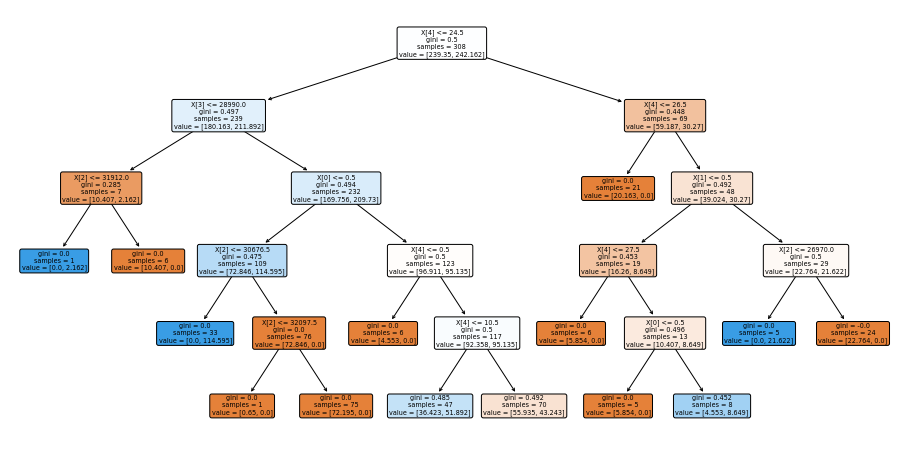

In [73]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(rf_model_1.estimators_[0],  
          filled=True, 
          impurity=True, 
          rounded=True)
plt.show()

In [74]:
rf_model_2 = RandomForestClassifier(n_estimators=10,
                                    criterion='entropy',
                                    max_depth = 6,
                                    min_samples_split= 5, 
                                    min_samples_leaf= 4,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    n_jobs= -1,
                                    class_weight='balanced')
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=10, n_jobs=-1)

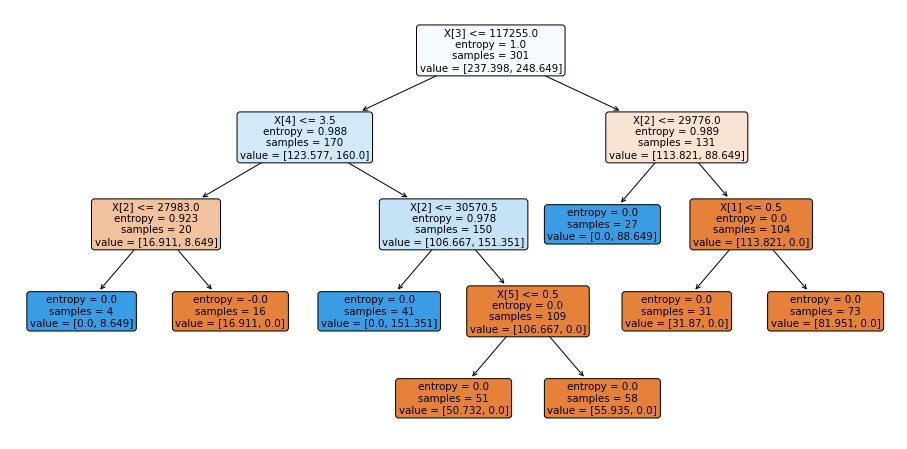

In [75]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(rf_model_2.estimators_[0],  
          filled=True, 
          impurity=True, 
          rounded=True)
plt.show()

## 8. Model Testing :

In [96]:
# Training data :

y_predict_train_1 = rf_model_1.predict(X_train)

# Test data :

y_predict_test_1 = rf_model_1.predict(X_test)

## 9. Model Evaluation :

In [97]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

### 9.1 Training data :

#### Model - 1 :

In [98]:
print('TRAINING MODEL - 1')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_1),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_1),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_1),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_1))
print('Classification Report :\n',classification_report(y_train,y_predict_train_1))

TRAINING MODEL - 1
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### 9.2 Test Data :

#### Model - 1:

In [99]:
print('TEST MODEL - 1')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_1),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_1),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_1),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_1))
print('Classification Report :\n',classification_report(y_test,y_predict_test_1))

TEST MODEL - 1
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[107   0]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        13

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

